<a href="https://colab.research.google.com/github/Preetham-Shetty/Data-Science/blob/main/BusinessSalesPredection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/content/BusinessSales.csv')
df.head()

,division,level of education,training level,work experience,salary,sales
0,peripherals,associate's degree,1,2,66790,193711
1,office supplies,high school,0,4,63143,200167
2,printers,associate's degree,0,6,86480,274258
3,computer software,associate's degree,2,5,103573,358491
4,computer hardware,some college,1,2,72166,216003


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   division            1000 non-null   object
 1   level of education  1000 non-null   object
 2   training level      1000 non-null   int64 
 3   work experience     1000 non-null   int64 
 4   salary              1000 non-null   int64 
 5   sales               1000 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 47.0+ KB


In [4]:
df.drop_duplicates(inplace=True)

In [5]:
import numpy as np

cols = df.columns
str_col = []

for i in range(0,len(cols)):
  if df[cols[i]].dtype == object:
    str_col.append(cols[i])

for i in range(0,len(str_col)):
  keys = df[str_col[i]].unique()
  ind = np.arange(1,len(keys)+1)
  d = {keys[i]:ind[i] for i in range(0,len(keys))}
  df[str_col[i]] = df[str_col[i]].map(d) 

In [6]:
df.head()

,division,level of education,training level,work experience,salary,sales
0,1,1,1,2,66790,193711
1,2,2,0,4,63143,200167
2,3,1,0,6,86480,274258
3,4,1,2,5,103573,358491
4,5,3,1,2,72166,216003


In [7]:
df.corr()

,division,level of education,training level,work experience,salary,sales
division,1.000000,-0.004610,0.000977,0.019537,0.126200,0.015016
level of education,-0.004610,1.000000,-0.040692,0.041108,-0.006544,0.009177
training level,0.000977,-0.040692,1.000000,0.019866,0.325558,0.523738
work experience,0.019537,0.041108,0.019866,1.000000,0.855077,0.819134
salary,0.126200,-0.006544,0.325558,0.855077,1.000000,0.904241
sales,0.015016,0.009177,0.523738,0.819134,0.904241,1.000000


In [8]:
import matplotlib.pyplot as plt

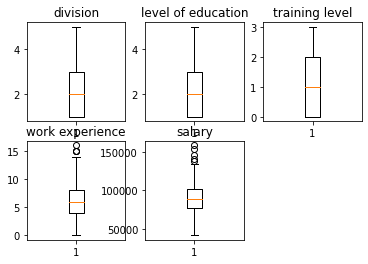

In [9]:
import seaborn as sbn

plane = 1
for i in range(0,(len(cols)-1)):
  plt.subplot(2,len(cols)/2,plane)
  plt.title(cols[i])
  plt.boxplot(df[cols[i]])
  plane+=1

#plt.figure(figsize = (20,20))

In [24]:
for i in range(0,len(cols)-1):
  q1 = df[cols[i]].quantile(0.25)
  q3 = df[cols[i]].quantile(0.75)

  iqr = q3-q1

  lower_bound = q1-1.5*iqr
  upper_bound = q1+1.5*iqr

  lc = df.index[(df[cols[i]]>upper_bound) | (df[cols[i]]<lower_bound)]
  print(cols[i],":",len(lc))

  for j in range(0,len(lc)):
    df.loc[lc[j],cols[i]] = upper_bound

division : 163
level of education : 4
training level : 0
work experience : 71
salary : 81


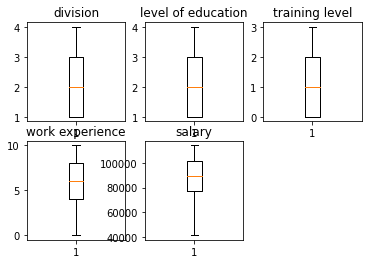

In [25]:
plane=1
for i in range(0,(len(cols)-1)):
  plt.subplot(2,len(cols)/2,plane)
  plt.title(cols[i])
  plt.boxplot(df[cols[i]])
  plane+=1

In [26]:
df.columns

Index(['division', 'level of education', 'training level', 'work experience',
       'salary', 'sales'],
      dtype='object')

In [27]:
X = df[['training level', 'work experience',
       'salary']]
y = df['sales']       

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train,X_test, y_train, y_test = train_test_split(X,y,train_size = 0.7, random_state=1)

In [30]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [31]:
lr.fit(X_train,y_train)

LinearRegression()

In [32]:
y_pred = lr.predict(X_test)

In [33]:
from sklearn.metrics import mean_absolute_percentage_error
print(mean_absolute_percentage_error(y_test,y_pred))

0.0770544239444121


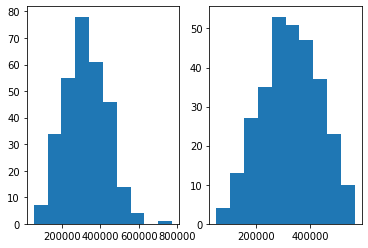

In [34]:
plt.subplot(1,2,1)
plt.hist(y_test)

plt.subplot(1,2,2)
plt.hist(y_pred)

plt.show()